# Data StoryTelling

Project idea is inspired from board games dateset by Mrpantherson: https://www.kaggle.com/mrpantherson/board-game-data)
Data is collected from gameboardgeek website using a modified python script. The original scrapperi is hosted at: https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek

In [34]:
import pandas as pd
import numpy as np   
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
#read csv file scrapped from Boardgamesgeek. It's a large file so it will longer to load.
url= "https://raw.githubusercontent.com/quangthuchien/Springboard-DataScience-CareerTrack/master/Capstone%20project%201%20-%20Boardgames/Data/games.csv"
df = pd.read_csv(url, encoding='utf-8')

#df = pd.read_csv(url, encoding='utf-8', dtype={'id': np.int32, 'type': str, 'name': str, 'yearpublished': str, 'minplayers': str, 'maxplayers': str, 'playingtime': str, 'minplaytime': str, 'maxplaytime': str, 'minage': str, 'users_rated': str, 'average_rating': str, 'bayes_average_rating': str,'total_owners': str, 'total_traders': str, 'total_wanters': str, 'total_wishers': str, 'total_comments': str, 'total_weights': str,'average_weight': str,'desc': str})

In [12]:
#Remove the b tags from data
for col in df:
    if col == 'type':
        pass
    else:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.strip(r"[b']")
        df[col] = df[col].str.replace('"','')
#df.head()

In [60]:
#Convert dataframe into appropriate types
for column in df:
    if (column != 'id') and (column != "type") and (column != "name") and (column != "desc"):
        df[column]=pd.to_numeric(df[column])
#df.dtypes

In [54]:
#Remove null values
pd.isnull(df).any()
df = df.dropna()

In [82]:
#Convert some floats into integers
df.yearpublished = df.yearpublished.astype(int)
df.minplayers = df.minplayers.astype(int)
df.maxplayers = df.maxplayers.astype(int)
df.minage = df.minage.astype(int)

In [83]:
#only select entries that is board games, don't select board games expansion
bg = df[df.type == 'boardgame']

In [84]:
#excludes game what no one wants
bg = bg[(bg.total_traders != 0) & (bg.total_wanters != 0) & (bg.total_wishers != 0)]

In [85]:
#exclude games that has no data for playing time
bg = bg[(bg.playingtime != 0) & (bg.minplaytime != 0) & (bg.maxplaytime != 0)]

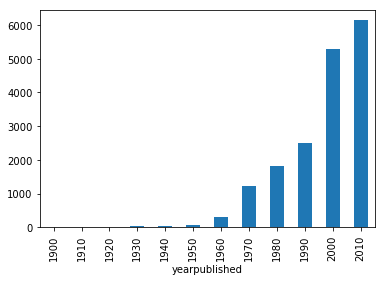

In [86]:
#plot number of games were published in each year recently 
g = bg[bg.yearpublished>1900]
g.groupby(g.yearpublished // 10 * 10).size().plot(kind='bar')

(array([  143.,    18.,    68.,   296.,  1365.,  4879.,  7147.,  3220.,
          312.,    14.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

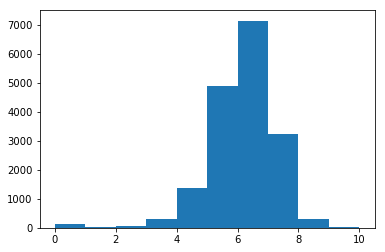

In [87]:
#plot number of game in each average rating point in the recent years
g = bg[bg.yearpublished>1900]
plt.hist(g.average_rating, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 

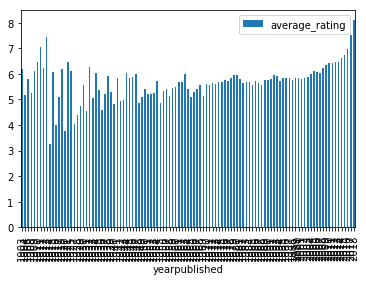

In [100]:
#Plot average rating of all games in a particular year
g = bg[bg.yearpublished>1900]
g = g[['yearpublished', 'average_rating']]
g = g.groupby(g.yearpublished).mean()
g.plot(kind='bar')

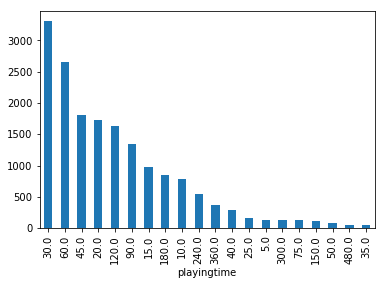

In [147]:
#How much play time for most games?
g = bg[bg.yearpublished>1900]
g = g[['playingtime', 'average_rating']]
g = g.groupby(g.playingtime).size()
g = g.sort_values(ascending=False).head(20)
g.plot(kind = 'bar')